<a href="https://colab.research.google.com/github/Vinayak-2003/OIBSIP_Iris_Flower_Classification_using_KNN_Algorithm/blob/main/IRIS_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IRIS Flower Classification

It is a classification problem as we have to classify which kind of flower specie it belongs to

## Import the libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

### Load the dataset

In [2]:
iris = pd.read_csv("Iris.csv")

In [3]:
print(iris.shape)

(150, 5)


In [4]:
print(iris.columns)

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [5]:
iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

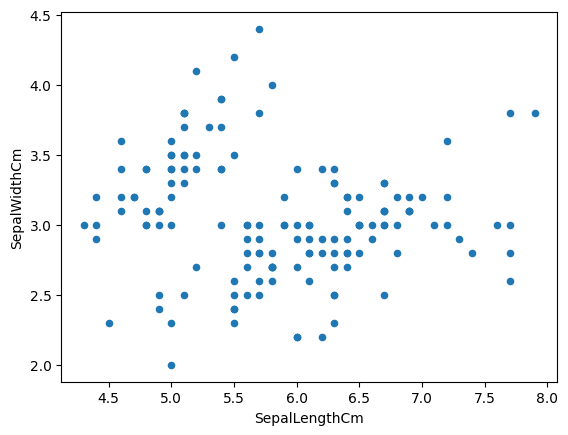

In [6]:
iris.plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm')
plt.show()

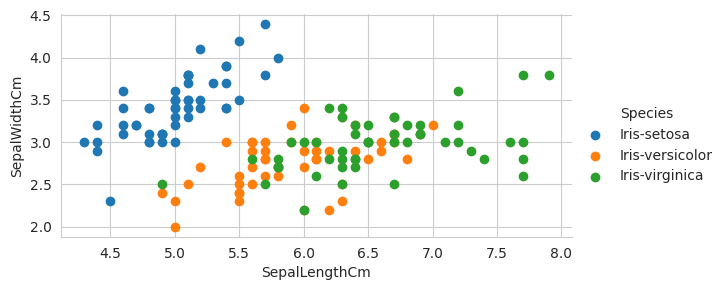

In [7]:
sns.set_style('whitegrid')
sns.FacetGrid(iris, hue='Species', aspect=2)\
              .map(plt.scatter, 'SepalLengthCm', 'SepalWidthCm')\
              .add_legend();
plt.show()

From the above plot we observe that


1.   From Sepal length and Sepal width we have distinguished Setosa flowers from others.
2.   Seprating versicolor ans virginicia is much harder as the points are overlapping.



## Pair Plot


*   Pairwise scatter plot
*   Can be used when number of pairs are high

*   cannot visualize higher demensional pattern i.e. 4D, 5D
*   Only possible to view 2D patetrns


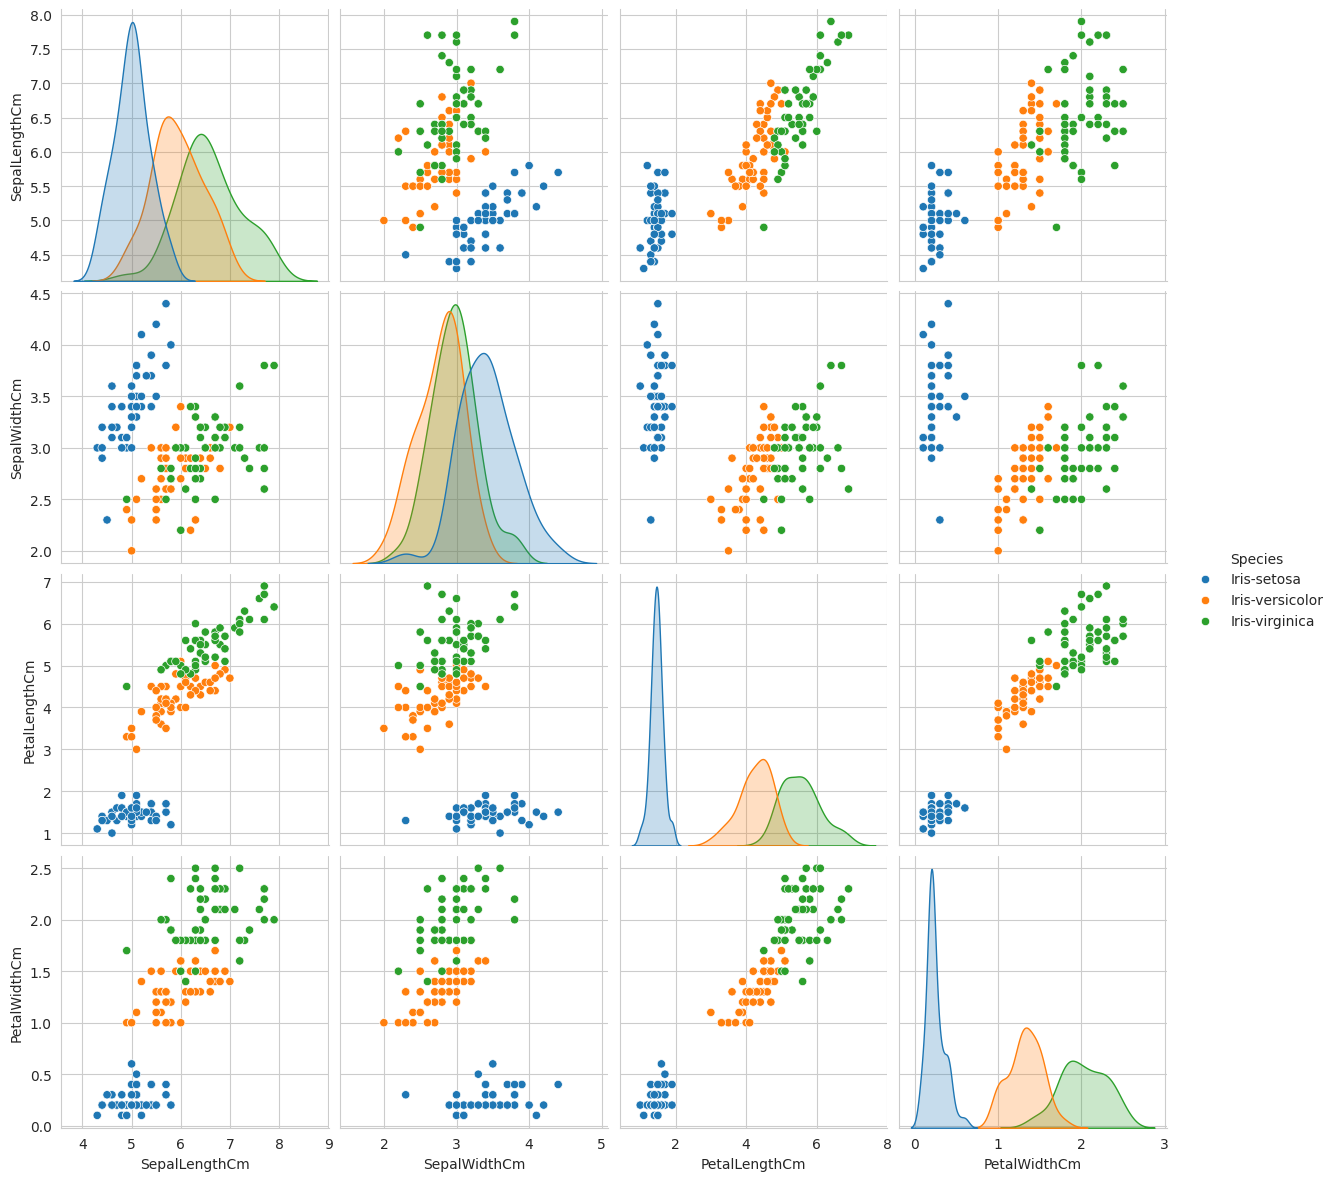

In [8]:
plt.close()
sns.set_style('whitegrid')
sns.pairplot(iris, hue='Species', height=3)
plt.show()

From the above plot we observe that


1.   Petal length and Petal width are the two most important feature to identify various flower types.
2.   While setosa can be easily identified (linearly seprabable) but other two versicolor and virginicia have some overlap (almost linearly seprabable).

1.   We can find lines and simple if-else conditions to build a simple model to classify different flower types.






### Univariate Analysis
single variable analysis

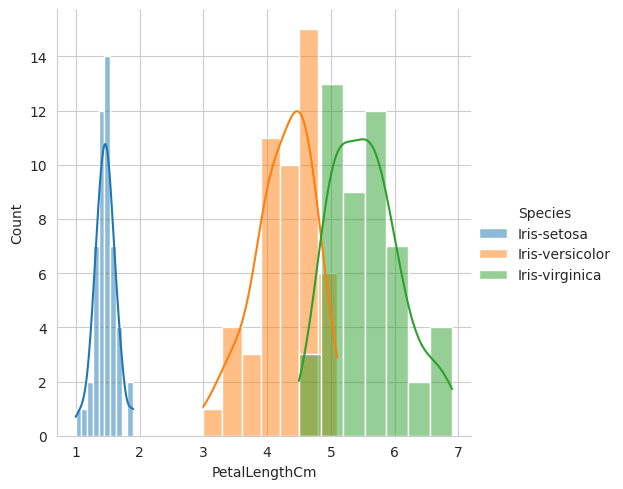

In [9]:
sns.FacetGrid(iris, hue='Species', height=5)\
              .map(sns.histplot, 'PetalLengthCm', kde=True)\
              .add_legend()
plt.show()

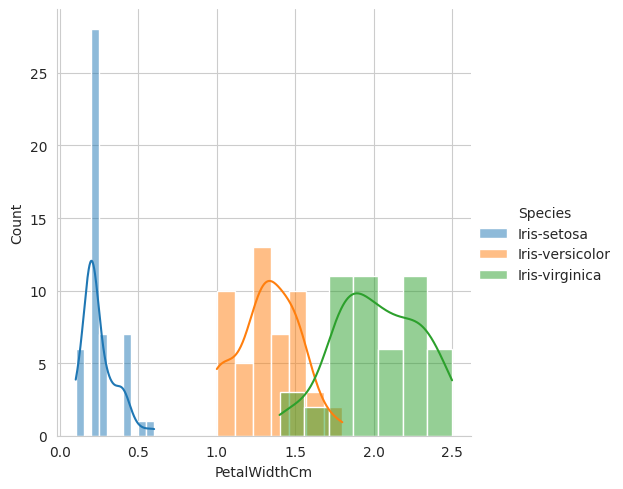

In [10]:
sns.FacetGrid(iris, hue='Species', height=5)\
              .map(sns.histplot, 'PetalWidthCm', kde=True)\
              .add_legend()
plt.show()

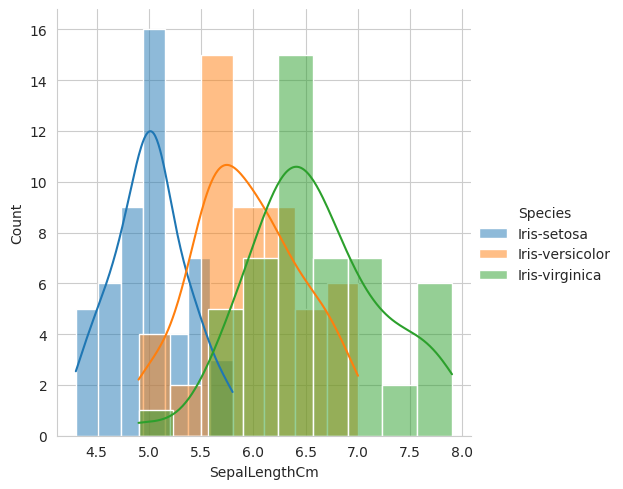

In [11]:
sns.FacetGrid(iris, hue='Species', height=5).map(sns.histplot, 'SepalLengthCm', kde=True).add_legend()
plt.show()

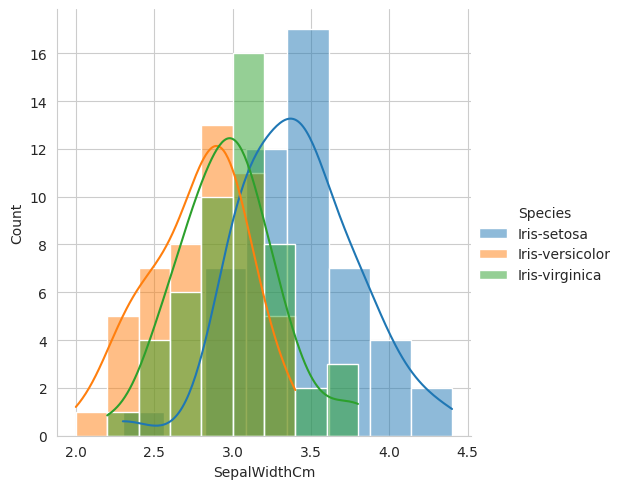

In [12]:
sns.FacetGrid(iris, hue='Species', height=5).map(sns.histplot, 'SepalWidthCm', kde=True).add_legend()
plt.show()

From the above plots we observe that


1.   Petal length is the best case because it seprates other setosa with other two types very clearly
2.   PL>PW>>SL>>SW



In [13]:
setosa = iris[iris['Species']=='Iris-setosa']
versicolor =iris[iris['Species']=='Iris-versicolor']
virginica =iris[iris['Species']=='Iris-virginica']


# Mean for PetalLengthCm
print(np.mean(setosa["PetalLengthCm"]))

1.464


### Cumulative Distribution Function (CDF)

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
[0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
[3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]
[0.02 0.1  0.24 0.08 0.18 0.16 0.1  0.04 0.02 0.06]
[4.5  4.74 4.98 5.22 5.46 5.7  5.94 6.18 6.42 6.66 6.9 ]


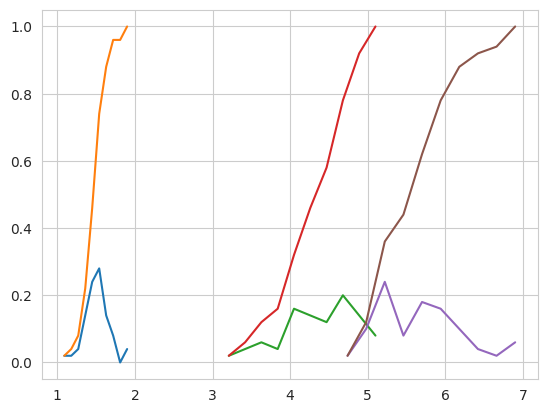

In [14]:

counts, bin_edges = np.histogram(setosa['PetalLengthCm'], bins=10, density=True)

pdf = counts/(sum(counts))        #probability density function
print(pdf)
print(bin_edges)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

counts, bin_edges = np.histogram(versicolor['PetalLengthCm'], bins=10, density=True)

pdf = counts/(sum(counts))        #probability density function
print(pdf)
print(bin_edges)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

counts, bin_edges = np.histogram(virginica['PetalLengthCm'], bins=10, density=True)

pdf = counts/(sum(counts))        #probability density function
print(pdf)
print(bin_edges)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.show()

### Mean and Standard deviation

In [15]:
print("Mean: ")
print(np.mean(setosa['PetalLengthCm']))
print(np.mean(versicolor['PetalLengthCm']))
print(np.mean(virginica['PetalLengthCm']))

Mean: 
1.464
4.26
5.5520000000000005


In [16]:
print("Standard deviation: ")               #spread
print(np.std(setosa['PetalLengthCm']))
print(np.std(versicolor['PetalLengthCm']))
print(np.std(virginica['PetalLengthCm']))

Standard deviation: 
0.17176728442867112
0.4651881339845203
0.546347874526844


In [17]:
print("Median: ")
print(np.median(setosa['PetalLengthCm']))
print(np.median(versicolor['PetalLengthCm']))
print(np.median(virginica['PetalLengthCm']))

Median: 
1.5
4.35
5.55


In [18]:
print("Quantiles: ")
print(np.percentile(setosa['PetalLengthCm'], np.arange(0,100,25)))        #np.arange(start,end,gap)
print(np.percentile(versicolor['PetalLengthCm'], np.arange(0,100,25)))
print(np.percentile(virginica['PetalLengthCm'], np.arange(0,100,25)))

Quantiles: 
[1.    1.4   1.5   1.575]
[3.   4.   4.35 4.6 ]
[4.5   5.1   5.55  5.875]


In [19]:
print("90th Percentile")
print(np.percentile(setosa['PetalLengthCm'], 90))
print(np.percentile(versicolor['PetalLengthCm'], 90))
print(np.percentile(virginica['PetalLengthCm'], 90))

90th Percentile
1.7
4.8
6.31


### Box plot

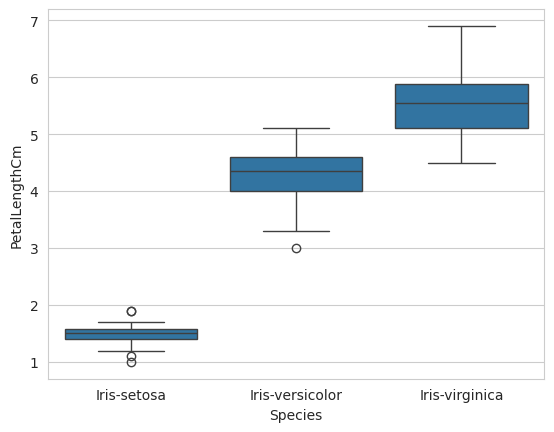

In [20]:
sns.boxplot(x='Species', y='PetalLengthCm', data=iris)
plt.show()

## Violin Plot
Combination of histogram PDF and Box plot

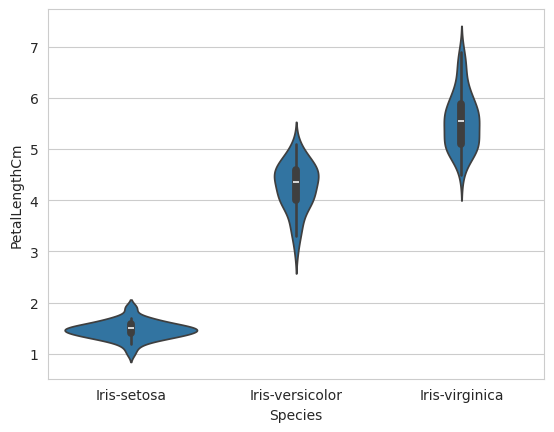

In [21]:
sns.violinplot(x='Species', y='PetalLengthCm', data=iris)
plt.show()

### Applying KNN

In [22]:
x = iris.drop("Species", axis=1)            #for independent variables, "Species" is dependent
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [23]:
y = iris["Species"]
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [24]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [25]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [26]:
y_pred = knn.predict(X_test)

In [27]:
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  1.0


In [28]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [29]:
X_test.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3


In [30]:
new_data = pd.DataFrame({"SepalLengthCm":[6.7],
                         "SepalWidthCm":6.5,
                         "PetalLengthCm":3.4,
                         "PetalWidthCm":2.9})

In [31]:
new_pred = knn.predict(new_data)
new_pred

array(['Iris-virginica'], dtype=object)

### Here,  we have given values for "SepalLengthCm", SepalWidthCm", "PetalLengthCm", "PetalWidthCm" as 6.7, 6.5, 3.4, and 2.9 respectively and the model correctly predicted the output as "Iris-virginica".


## Therefore, from the above case we have proved that our KNN model is working correctly and have predicted the type of flower.
